# Lab10-ESP32-Use-LED-Component

การ build ด้วย CMake ช่วยให้โปรเจค ESP32 สามารถดึง component จากที่ต่าง ๆ มาร่วมสร้างโปรแกรมได้ ทั้งนี้โดยการสร้างไฟล์ idf_component.yml ไว้ในโฟลเดอร์ Main

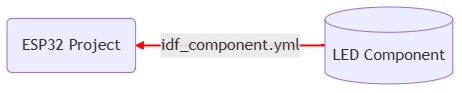


การดึง component มาใช้งาน ช่วยให้ประหยัดเวลาและลดข้อผืดพลาดในการเขียนโปรแกรมได้มาก

## การทดลองนำเข้า component จาก github

### 1.สร้าง ESP32 project ใหม่ "ไฟกระพริบด้วย component"

1.1 ตั้งชื่อโปรเจค  `LED_Flash_with_component`

1.2 สร้างไฟล์ idf_component.yml ขึ้นใน Main พร้อมใส่เนื้อหาต่อไปนี้


``` yml
dependencies:
  LED:
    git: https://github.com/koson/LED_Test.git    # เปลี่ยนเป็น url ที่นักศึกษา push ไว้บน git
    path: components/LED
```


หมายเหตุ ในบรรทัด git: ให้ใส่ชื่อ repository ของนักศึกษาที่มีคอมโพเนนท์ LED

1.3 แก้ไขไฟล์ CMAkeLists.txt โดยเปลี่ยน  `main.c` เป็น `main.cpp` ดังต่อไปนี้

In [ ]:
idf_component_register(SRCS "main.cpp"
                    INCLUDE_DIRS ".")


1.4 เปลี่ยนชื่อไฟล์  `main.c` เป็น `main.cpp` และแก้ code  เป็นดังนี้

In [ ]:
#include <stdio.h>
#include "freertos/FreeRTOS.h"
#include "freertos/task.h"
#include "LED.h"

extern "C" void app_main(void);

void app_main(void)
{
    LED led1(5); 
    LED led2(17); 
    while(1)
    {        
        led1.ON();
        led2.OFF();
        vTaskDelay(500/portTICK_PERIOD_MS);
        led1.OFF();
        led2.ON();
        vTaskDelay(500/portTICK_PERIOD_MS);
    }
}


1.5 Build และทดสอบด้วยบอร์ด ESP32 ถ้ารันผ่าน ให้ commit ขึ้นบน github

จะสังเกตว่าในขั้นตอนการ build จะมีข้อความต่อไปนี้ ซึ่งเป็นการแจ้งให้ทราบว่า CMake ได้ดึง component ที่ชื่อ LED และ idf จาก internet มาร่วมสร้าง code



In [ ]:
.....
Processing 2 dependencies:
[1/2] LED (838c47debbba86b33b24f9ab9ec71d2c00a4bf48)
[2/2] idf (4.4.7)
......


และใน project จะมีโฟลเดอร์ managed_components เพิ่มเข้ามา ด้านในจะมี LED อยู่เช่นเดียวกับตอนที่สร้างเป็น component ในโปรเจค




1.6 แก้ไขไฟล์ main.cpp ให้เป็นดังนี้



In [ ]:
#include <stdio.h>
#include "freertos/FreeRTOS.h"
#include "freertos/task.h"
#include "LED.h"

LED led1(16); 
LED led2(17); 
LED led3(5); 
LED led4(18); 
LED led5(19); 
LED led6(21); 
LED led7(22); 
LED led8(23); 

void ALL_LED_OFF()
{
    led1.OFF();
    led2.OFF();
    led3.OFF();
    led4.OFF();
    led5.OFF();
    led6.OFF();
    led7.OFF();
    led8.OFF();
}

extern "C" void app_main(void)
{
    int i = 0;
    while(1)
    {        
        switch(i)
        {
            case 0:
            led1.ON();
            break;
            case 1:
            led2.ON();
            break;
            case 2:
            led3.ON();
            break;
            case 3:
            led4.ON();
            break;
            case 4:
            led5.ON();
            break;
            case 5:
            led6.ON();
            break;
            case 6:
            led7.ON();
            break;
            case 7:
            led8.ON();
            break;            
        }
        vTaskDelay(100/portTICK_PERIOD_MS);
        ALL_LED_OFF();
        if(i++ >= 7) i = 0;
    }
}


1.8 เชื่อมต่อสายไปยัง LED ตาม code ที่ปรากฏ เช่น `LED led1(16);` หมายถึงต่อ LED1 เช้ากับขา 16 เป็นต้น

1.9 Build และทดสอบด้วยบอร์ด ESP32 ถ้ารันผ่าน ให้ commit ขึ้นบน github

1.10 แก้ไขไฟล์ main.cpp ให้เป็นดังนี้



In [ ]:
#include <stdio.h>
#include "freertos/FreeRTOS.h"
#include "freertos/task.h"
#include "LED.h"

LED led1(16); 
LED led2(17); 
LED led3(5); 
LED led4(18); 
LED led5(19); 
LED led6(21); 
LED led7(22); 
LED led8(23); 

LED leds[] = {led1, led2, led3, led4, led5, led6, led7, led8};

extern "C" void app_main(void)
{
    int i = 0;
    while(1)
    {        
        leds[i].ON();
        vTaskDelay(100/portTICK_PERIOD_MS);
        leds[i].OFF();
        if(i++ >= 7) i = 0;
    }
}



1.11 Build และทดสอบด้วยบอร์ด ESP32 ถ้ารันผ่าน ให้ commit ขึ้นบน github


## Challenge

ให้ทำไฟวิ่งเป็น pattern วิ่งวนลูป ดังต่อไปนี้ 
`*` หมายถึงหลอดไฟติด 
`.` หมายถึงหลอดไฟดับ

1. ไฟวิ่งดวงเดียว 
```
    *.......
    .*......
    ..*.....
    ...*....
    ....*...
    .....*..
    ......*.
    .......*
```

2. ไฟวิ่งสองดวงสวนกันตรงกลาง 
```
    *......*
    .*....*.
    ..*..*..
    ...**...
    ...**...
    ..*..*..
    .*....*.
    *......*
```

3. ไฟวิ่งไปกลับ 
```
    *.......
    .*......
    ..*.....
    ...*....
    ....*...
    .....*..
    ......*.
    .......*
    ......*.
    .....*..
    ....*...
    ...*....
    ..*.....
    .*......
    *.......
```
